In [1]:
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

available = set()
# 寻找系统中所有 .ttf 和 .ttc 字体文件
font_files = fm.findSystemFonts(fontpaths=None, fontext='ttf') + fm.findSystemFonts(fontpaths=None, fontext='ttc')

for fpath in font_files:
    try:
        # 尝试从字体文件中获取字体名称
        fp = fm.FontProperties(fname=fpath)
        name = fp.get_name()
    except Exception:
        # 如果该字体文件不能正确解析，就跳过
        continue
    # 只挑带有“中文”常见关键字的字体
    if any(key in name for key in ["Heiti", "PingFang", "Songti", "STHeiti", "Song", "Hei", "Fang"]):
        available.add(name)

print("macOS 上可能支持中文的字体有：")
for nm in sorted(available):
    print("  •", nm)

macOS 上可能支持中文的字体有：
  • FangSong_GB2312
  • Heiti TC
  • Songti SC


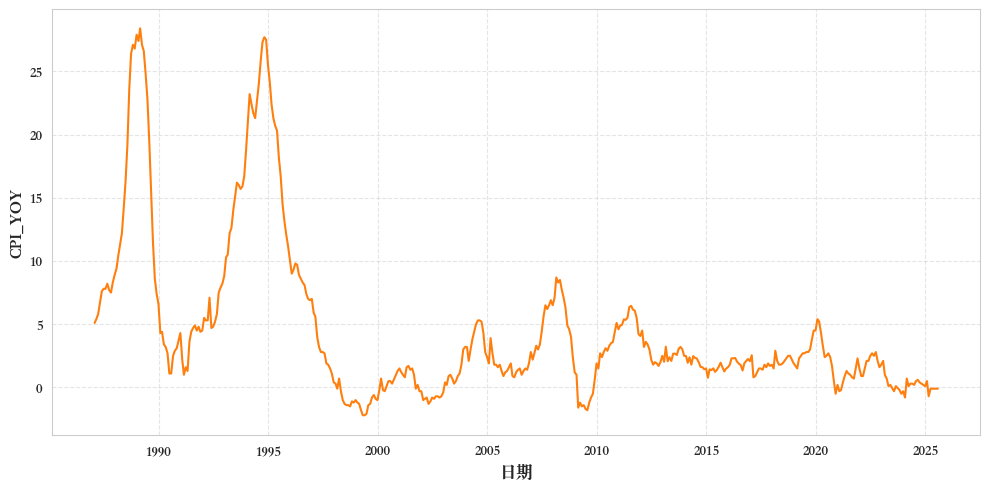

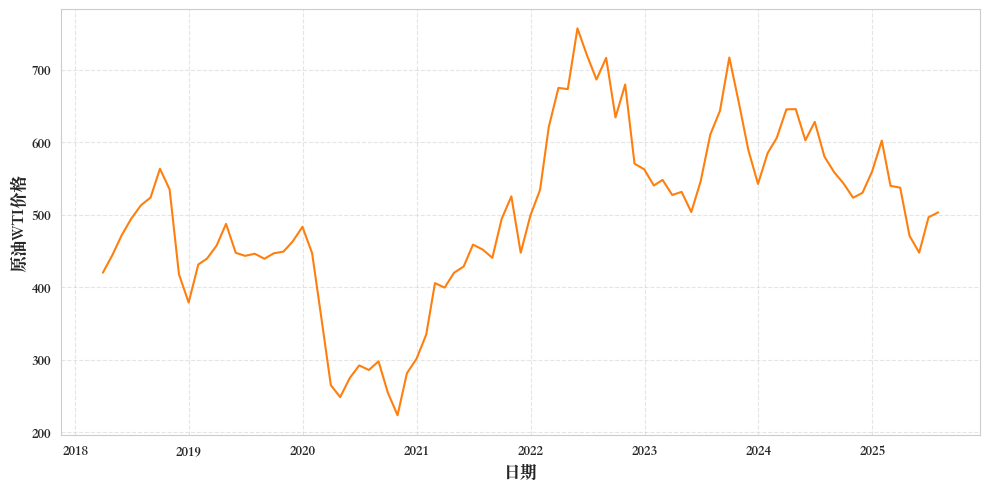

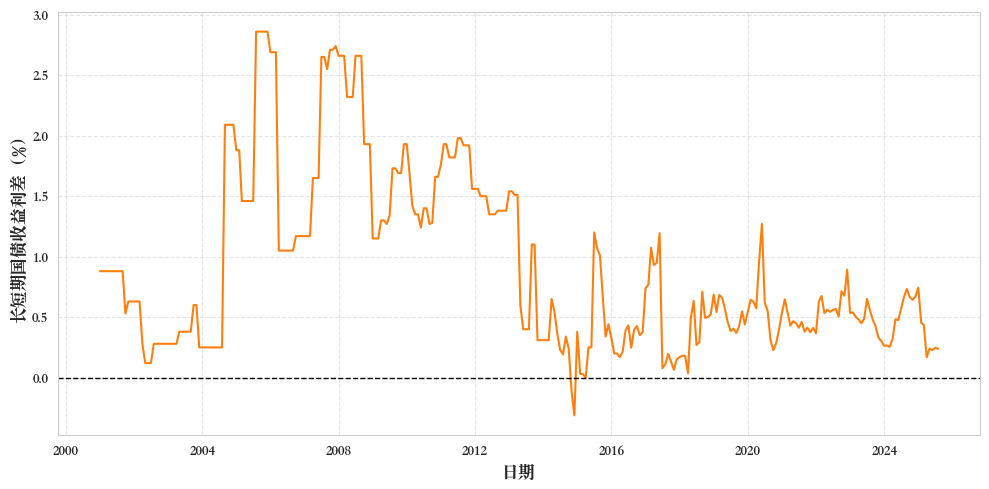

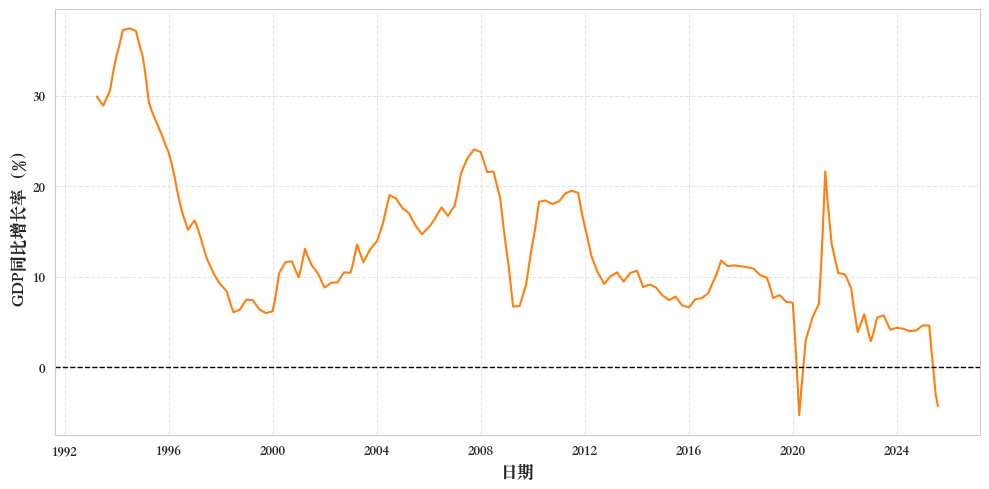

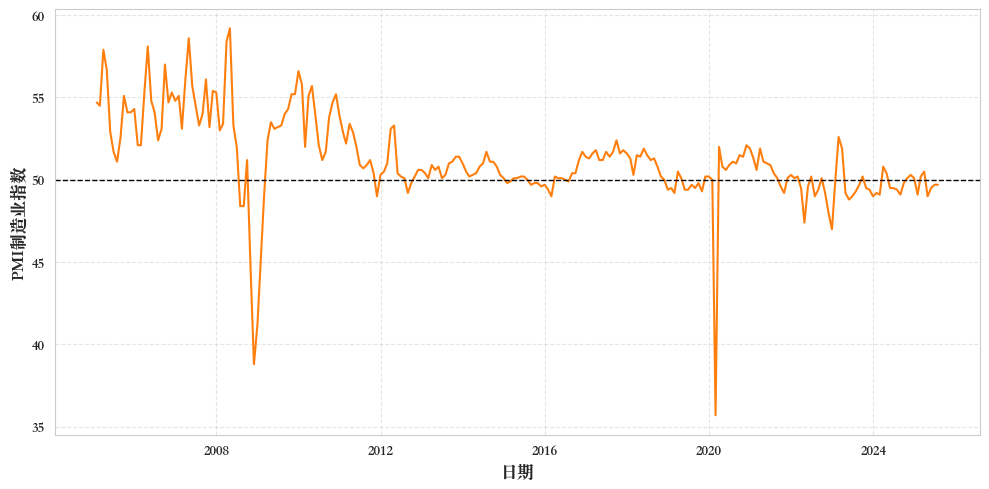

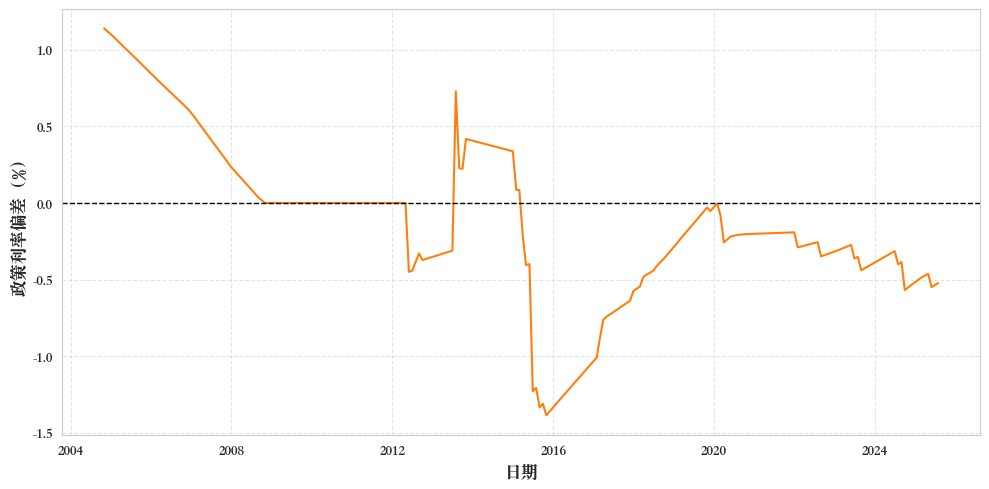

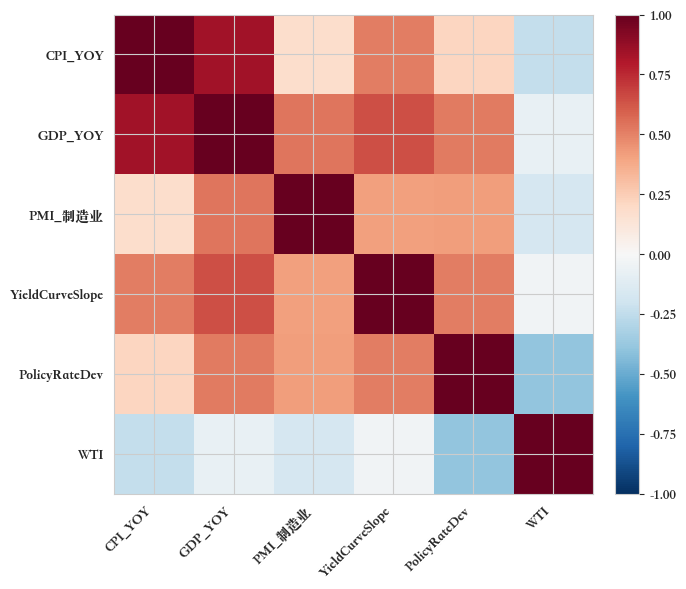

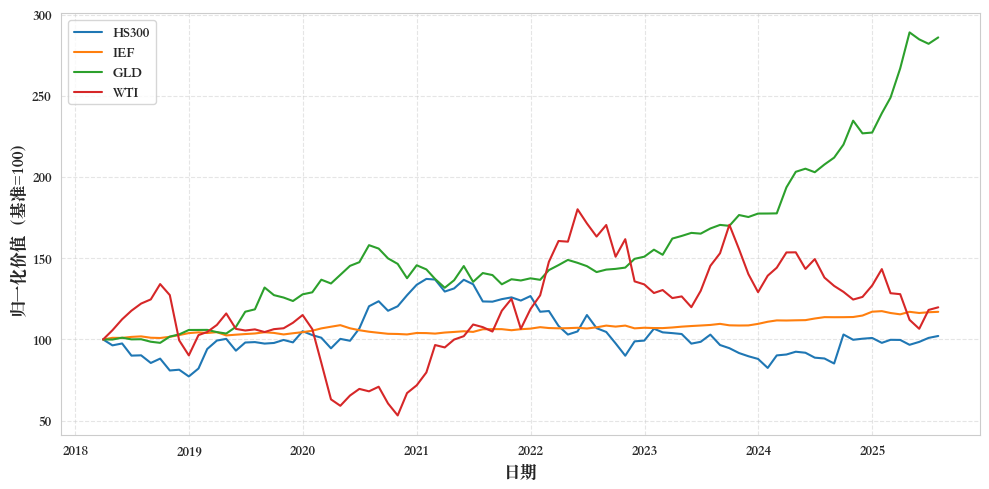

In [4]:
# 1. 指定全局中文字体：把字体名称改成 macOS 上实际存在的字体即可
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False

# —— 1. 读取与预处理 —— #
df = pd.read_csv('data_China.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# —— 2. 计算宏观因子 —— #
df['CPI_YOY']        = df['CPI_同比']
df['GDP_YOY']   = df['GDP_现价'].pct_change(periods=12) * 100  # 同比增长率
df['PMI_制造业'] = df['PMI']
df['YieldCurveSlope']= df['10Y国债利率'] - df['2Y国债利率']
# df['CreditSpread']   = df['AAA_公司债利率'] - df['10Y国债利率']
df['PolicyRate_Mean10Y'] = df['政策利率'].rolling(window=60).mean()
df['PolicyRateDev']  = df['政策利率'] - df['PolicyRate_Mean10Y']
# df['Unemployment']   = df['失业率']
df['WTI'] = df['WTI']

factors = df[['CPI_YOY', 'GDP_YOY', 'PMI_制造业', 'YieldCurveSlope', 'PolicyRateDev', 'WTI']]

# —— 3. 绘制各宏观因子时间序列 —— #
plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['CPI_YOY'], color = 'tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('CPI_YOY', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['WTI'], color='tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('原油WTI价格', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['YieldCurveSlope'], color='tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('长短期国债收益利差（%）', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['GDP_YOY'], color='tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('GDP同比增长率（%）', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['PMI_制造业'], color='tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('PMI制造业指数', fontsize=12)
plt.axhline(50, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

plt.figure(figsize=(10, 5))
plt.plot(factors.index, factors['PolicyRateDev'], color='tab:orange', linewidth=1.5)
plt.xlabel('日期', fontsize=12); plt.ylabel('政策利率偏差（%）', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()


# —— 4. 相关矩阵热力图 —— #
corr_matrix = factors.corr()
plt.figure(figsize=(7, 6))
im = plt.imshow(corr_matrix.values, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
labels = corr_matrix.columns
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(labels)), labels, fontsize=10)
plt.tight_layout(); plt.show()

# —— 5. 资产归一化对比 —— #
assets = df[['HS300', 'IEF', 'GLD', 'WTI']].dropna()
assets_norm = assets / assets.iloc[0] * 100

plt.figure(figsize=(10, 5))
for col in assets_norm.columns:
    plt.plot(assets_norm.index, assets_norm[col], linewidth=1.5, label=col)
plt.xlabel('日期', fontsize=12); plt.ylabel('归一化价值（基准=100）', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()